## AI1104: Programming with AI 

Homework 1 - Question 1: Logistic Regression

Author: Tanmay Goyal, AI20BTECH11021



In [1]:
#importing required packages
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def training_points(N , m = 1):
    '''
    Function to generate training points. 

    Param: 
    N = No. of points generated  
    m = Degree of polynomial(default = 1)

    Returns: 
    x- 1-D array of points
    y- the true outputs
    X- feature matrix
    '''

    #generating N floating points between 0 and 2*pi
    x = np.linspace(0,2*np.pi , N)

    #generating noise
    mean = 0
    std = 0.05
    noise = np.random.normal(mean, std, N)

    #generating sine curve
    y = np.sin(x)

    #adding noise 
    y += noise
    
    #to create feature matrix X we need to create a adjacent column of ones to already existing x
    s = x.reshape(N,1)

    X = np.hstack((np.ones(s.shape) , s))


    #if m > 1 then we need to add additional columns comprising of the powers of the input features
    if m > 1:
        for idx in range(2 , m+1):
            X = np.hstack((X , s ** idx))
            

    return x , y , X


The optimal solution of weights is given by :

$ \beta^* = (X^T X)^{-1} X^T y $

where $(X^T X)^{-1}$ is called as pseudo- inverse of X

In [3]:
def weights(X , y):
    '''
    Calculates the optimal weights given by (X.T * X)^-1 * X.T * y
    
    param:
    X = Feature matrix
    y = true output matrix

    returns:
    weight- matrix of optimal weights

    '''
    pseudo_inverse = np.linalg.inv(np.matmul(X.T , X))
    weight = pseudo_inverse @ X.T @ y


    return weight

In [4]:
def test_points(N , m=1):
    '''
    Function to generate test points. 

    Param: 
    N = No. of points generated 
    m = Degree of polynomial(default = 1)
    
    Returns: 
    x- 1-D array of points
    y- the true outputs
    X- feature matrix
    '''

    #generating N floating points between 0 and 2*pi
    x = np.linspace(0,2*np.pi , N)

    #generating noise
    mean = 0
    std = 0.05
    noise = np.random.normal(mean, std, N)

    #generating sine curve
    y = np.sin(x)

    #adding noise 
    y += noise

    #to create feature matrix X we need to create a adjacent column of ones to already existing x
    s = x.reshape(N,1)

    X = np.hstack((np.ones(s.shape) , s))


    #if m > 1 then we need to add additional columns comprising of the powers of the input features
    if m > 1:
        for idx in range(2 , m+1):
            X = np.hstack((X , s ** idx))
            

    return x , y , X


In [5]:
def report(x_train ,y_train , X_train , x_test , y_test , X_test , weights):
    '''
    function that reports the model's performance qualitatively and quantitatively
    param:
    x_train: 1-D array of training points
    y_train: true outputs of training points
    X_train: feature matrix of training points
    x_test: 1-D array of testing points
    y_test: true outputs of testing points
    X_test: feature matrix of testing points
    weights: set of optimal weights

    returns:
    None

    '''

    N_train = len(x_train) #no of training points
    N_test = len(x_test)   #no of test points
    m = X_train.shape[1] - 1 #degree of polynomial model

    y_hat_train = np.matmul(X_train , weights)
    y_hat_test = np.matmul(X_test, weights)

    #plotting training points and model generated
    plt.plot(x_train , y_train , 'bx' , label = "training points")
    plt.plot(x_train , y_hat_train , 'r' , label = "predicted model")
    plt.grid(True)
    plt.legend()
    plt.xlabel("x_train")
    plt.ylabel("y_train")
    plt.title("Training points and model for N  = {} and m = {}".format(N_train , m))
    plt.show()

    #calculating training error
    training_error = np.sum((y_hat_train - y_train)** 2)
    training_error /= N_train

    print("\n Training error for N = {} and m = {} is {} \n".format(N_train , m , training_error))

    #plotting test points
    plt.plot(x_test , y_hat_test , 'bx' , label = "test points")
    plt.grid(True)
    plt.legend()
    plt.xlabel("x_test")
    plt.ylabel("y_hat_test")
    plt.title("Testing points for N  = {} and m = {}".format(N_train , m))
    plt.show()
    
    #calculating testing error
    testing_error = np.sum((y_hat_test - y_test)**2)
    testing_error /= N_test

    print("\n Testing error for N = {} and m = {} is {} \n".format(N_train , m , testing_error))


## Results:

a) $\hat{y} = f(x , \theta) = \beta_0 + \beta_1x$  for $N = 10$

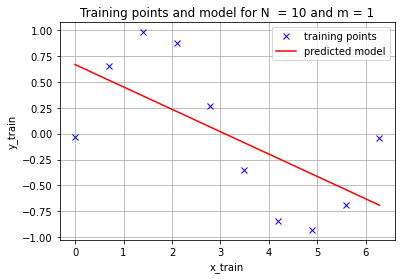


 Training error for N = 10 and m = 1 is 0.2528516174218025 



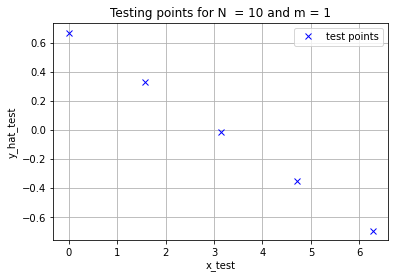


 Testing error for N = 10 and m = 1 is 0.3553661066463077 


 The model is underfitting.


In [6]:
N=10

x_train,y_train,X_train = training_points(N , m=1)

w = weights(X_train,y_train)

x_test , y_test , X_test = test_points(N//2 , m=1) 

report(x_train , y_train , X_train , x_test , y_test , X_test ,w)

print("\n The model is underfitting.")

a) $\hat{y} = f(x , \theta) = \beta_0 + \beta_1x$  for $N = 100$

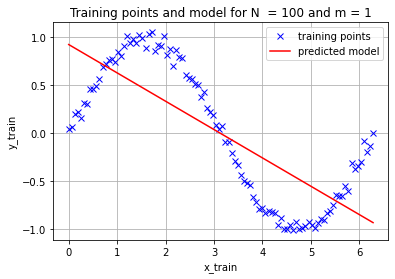


 Training error for N = 100 and m = 1 is 0.20247517982697377 



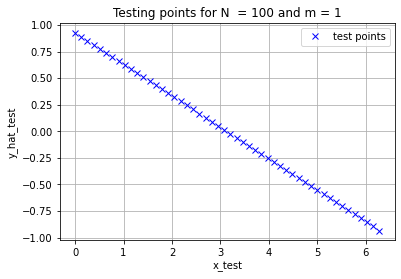


 Testing error for N = 100 and m = 1 is 0.2124087108668863 


 The model is underfitting.


In [7]:
N=100
x_train,y_train,X_train = training_points(N = 100 , m=1)

w = weights(X_train,y_train)

x_test , y_test , X_test = test_points(N//2 , m=1)

report(x_train , y_train , X_train , x_test , y_test , X_test ,w)

print("\n The model is underfitting.")

a) $\hat{y} = f(x , \theta) = \beta_0 + \beta_1x$  for $N = 1000$

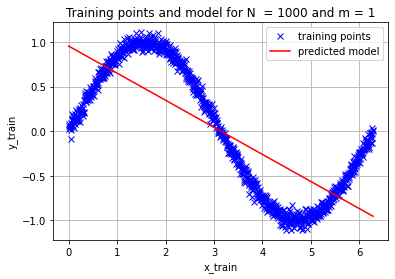


 Training error for N = 1000 and m = 1 is 0.1988644235235252 



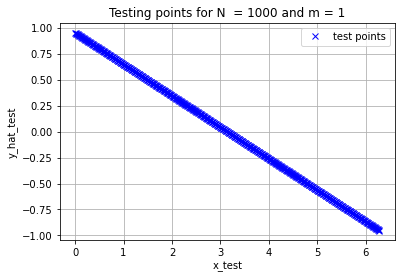


 Testing error for N = 1000 and m = 1 is 0.19993310000640646 


 The model is underfitting.


In [8]:
N=1000

x_train,y_train,X_train = training_points( N, m=1)

w = weights(X_train,y_train)

x_test , y_test , X_test = test_points(N//2 , m=1)

report(x_train , y_train , X_train , x_test , y_test , X_test ,w)

print("\n The model is underfitting.")

b) $\hat{y} = f(x,\theta) = \beta_0 + \beta_1 x + \ldots \beta_m x^m$ for $N = 10$ and $m = 2$

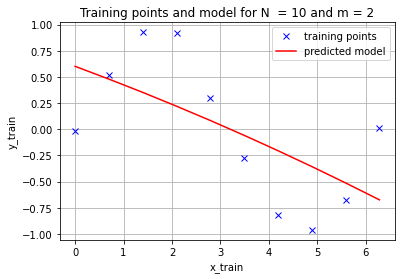


 Training error for N = 10 and m = 2 is 0.25370698129168556 



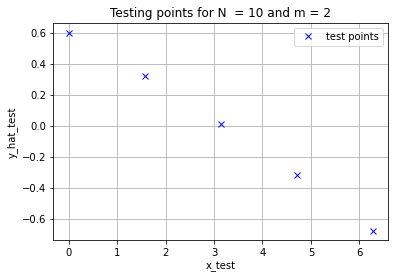


 Testing error for N = 10 and m = 2 is 0.38033192923745124 


 The model is underfitting.


In [9]:
N=10

x_train,y_train,X_train = training_points( N, m=2)

w = weights(X_train,y_train)

x_test , y_test , X_test = test_points(N//2, m=2)

report(x_train , y_train , X_train , x_test , y_test , X_test ,w)

print("\n The model is underfitting.")

b) $\hat{y} = f(x,\theta) = \beta_0 + \beta_1 x + \ldots \beta_m x^m$ for $N = 100$ and $m = 2$

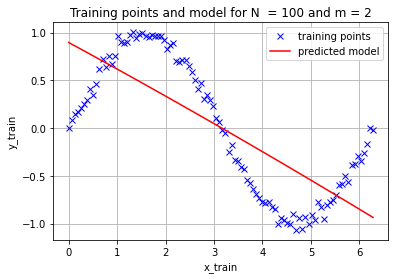


 Training error for N = 100 and m = 2 is 0.204220079743189 



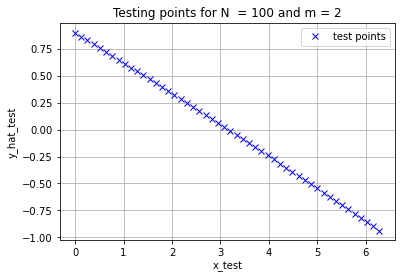


 Testing error for N = 100 and m = 2 is 0.21048026438097714 


 The model is underfitting.


In [10]:
N=100

x_train,y_train,X_train = training_points( N, m=2)

w = weights(X_train,y_train)

x_test , y_test , X_test = test_points(N//2 , m=2)

report(x_train , y_train , X_train , x_test , y_test , X_test ,w)

print("\n The model is underfitting.")

b) $\hat{y} = f(x,\theta) = \beta_0 + \beta_1 x + \ldots \beta_m x^m$ for $N = 1000$ and $m = 2$

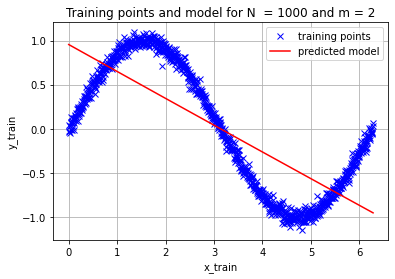


 Training error for N = 1000 and m = 2 is 0.199719559311767 



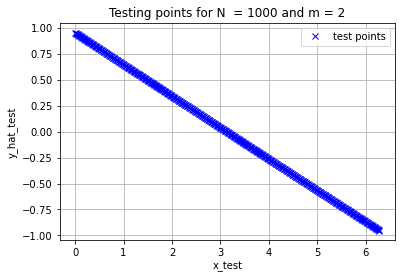


 Testing error for N = 1000 and m = 2 is 0.2033423420436813 


 The model is underfitting.


In [11]:
N=1000

x_train,y_train,X_train = training_points( N, m=2)

w = weights(X_train,y_train)

x_test , y_test , X_test = test_points(N//2 , m=2)

report(x_train , y_train , X_train , x_test , y_test , X_test ,w)

print("\n The model is underfitting.")

b) $\hat{y} = f(x , \theta) = \beta_0 + \beta_1 x + \ldots \beta_m x^m$ for $N = 10$ and $m=3$

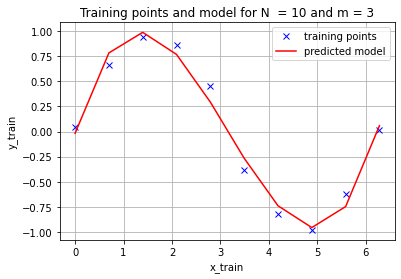


 Training error for N = 10 and m = 3 is 0.009469085702690689 



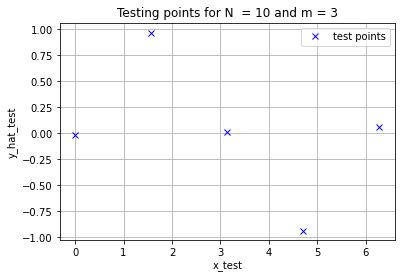


 Testing error for N = 10 and m = 3 is 0.003173190023882165 


 The model seems to be a good fit.


In [12]:
N=10

x_train,y_train,X_train = training_points( N, m=3)

w = weights(X_train,y_train)

x_test , y_test , X_test = test_points(N//2 , m=3)

report(x_train , y_train , X_train , x_test , y_test , X_test ,w)

print("\n The model seems to be a good fit.")

b) $\hat{y} = f(x , \theta) = \beta_0 + \beta_1 x + \ldots \beta_m x^m$ for $N = 100$ and $m=3$

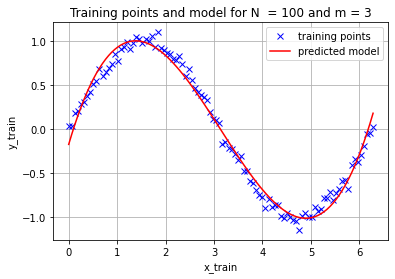


 Training error for N = 100 and m = 3 is 0.0070791457467439265 



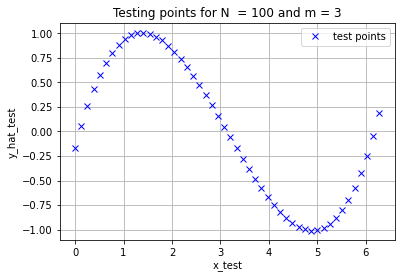


 Testing error for N = 100 and m = 3 is 0.009294463969771804 


 The model seems to be a good fit.


In [13]:
N=100

x_train,y_train,X_train = training_points( N, m=3)

w = weights(X_train,y_train)

x_test , y_test , X_test = test_points(N//2, m=3)

report(x_train , y_train , X_train , x_test , y_test , X_test ,w)

print("\n The model seems to be a good fit.")

b) $\hat{y} = f(x , \theta) = \beta_0 + \beta_1 x + \ldots \beta_m x^m$ for $N = 1000$ and $m=3$

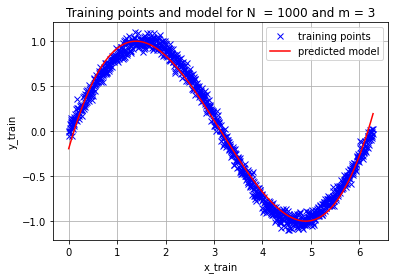


 Training error for N = 1000 and m = 3 is 0.007073210673534197 



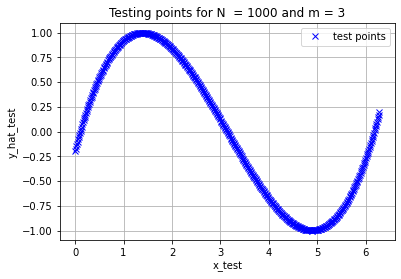


 Testing error for N = 1000 and m = 3 is 0.006877093400942002 


 The model seems to be a good fit.


In [14]:
N=1000

x_train,y_train,X_train = training_points( N, m=3)

w = weights(X_train,y_train)

x_test , y_test , X_test = test_points(N//2, m=3)

report(x_train , y_train , X_train , x_test , y_test , X_test ,w)

print("\n The model seems to be a good fit.")

b) $\hat{y} = f(x , \theta) = \beta_0 + \beta_1 x + \ldots \beta_m x^m$ for $N = 10$ and $m=4$

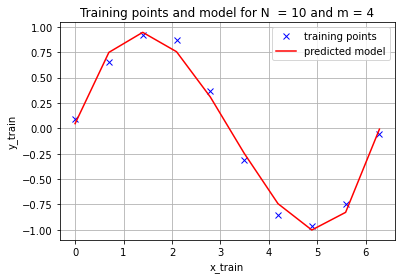


 Training error for N = 10 and m = 4 is 0.005781925022095556 



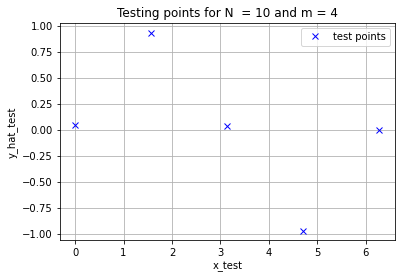


 Testing error for N = 10 and m = 4 is 0.006299817327884818 


 The model seems to be a better fit.


In [15]:
N=10

x_train,y_train,X_train = training_points( N, m=4)

w = weights(X_train,y_train)

x_test , y_test , X_test = test_points(N//2 , m=4)

report(x_train , y_train , X_train , x_test , y_test , X_test ,w)

print("\n The model seems to be a better fit.")

b) $\hat{y} = f(x , \theta) = \beta_0 + \beta_1 x + \ldots \beta_m x^m$ for $N = 100$ and $m=4$

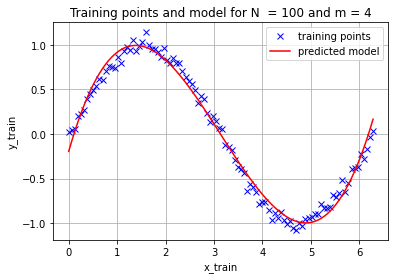


 Training error for N = 100 and m = 4 is 0.00703842711790839 



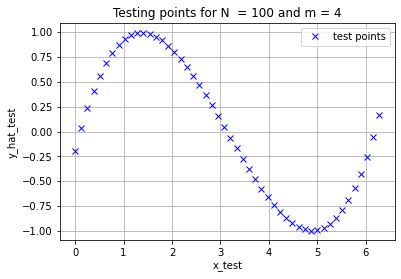


 Testing error for N = 100 and m = 4 is 0.005588258934424499 


 The model seems to be a better fit.


In [16]:
N=100

x_train,y_train,X_train = training_points( N, m=4)

w = weights(X_train,y_train)

x_test , y_test , X_test = test_points(N//2, m=4)

report(x_train , y_train , X_train , x_test , y_test , X_test ,w)

print("\n The model seems to be a better fit.")

b) $\hat{y} = f(x , \theta) = \beta_0 + \beta_1 x + \ldots \beta_m x^m$ for $N = 1000$ and $m=4$

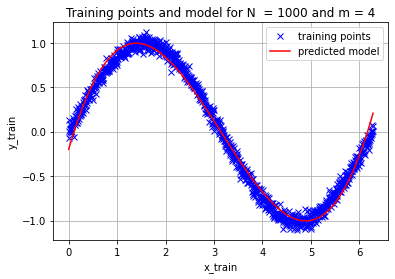


 Training error for N = 1000 and m = 4 is 0.006859303746194733 



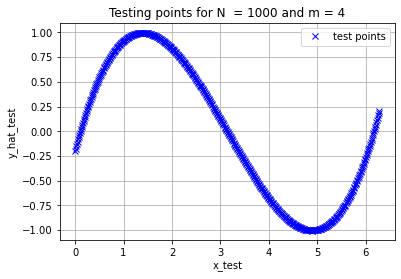


 Testing error for N = 1000 and m = 4 is 0.007528749912405699 


 The model seems to be a better fit.


In [17]:
N=1000

x_train,y_train,X_train = training_points( N, m=4)

w = weights(X_train,y_train)

x_test , y_test , X_test = test_points(N//2 , m=4)

report(x_train , y_train , X_train , x_test , y_test , X_test ,w)

print("\n The model seems to be a better fit.")

b) $\hat{y} = f(x , \theta) = \beta_0 + \beta_1 x + \ldots \beta_m x^m$ for $N = 10$ and $m=5$

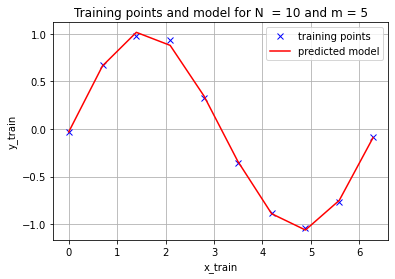


 Training error for N = 10 and m = 5 is 0.0006392519527067069 



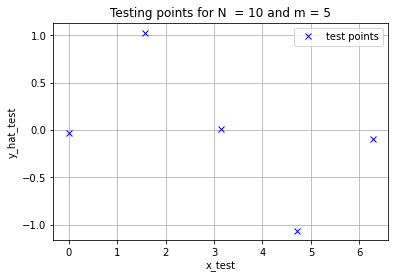


 Testing error for N = 10 and m = 5 is 0.0026503442985957113 


 The model seems to be the best fit.


In [18]:
N=10

x_train,y_train,X_train = training_points( N, m=5)

w = weights(X_train,y_train)

x_test , y_test , X_test = test_points(N//2 , m=5)

report(x_train , y_train , X_train , x_test , y_test , X_test ,w)

print("\n The model seems to be the best fit.")

b) $\hat{y} = f(x , \theta) = \beta_0 + \beta_1 x + \ldots \beta_m x^m$ for $N = 100$ and $m=5$

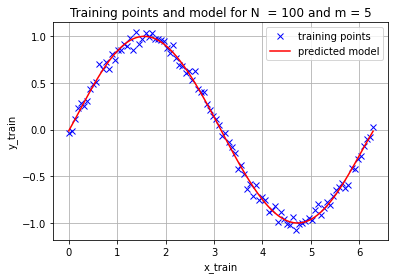


 Training error for N = 100 and m = 5 is 0.002505559241696846 



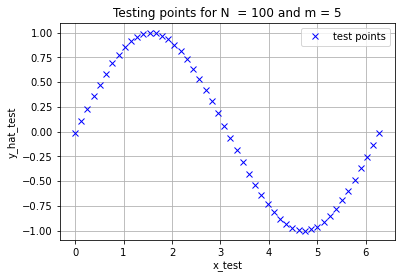


 Testing error for N = 100 and m = 5 is 0.001947574950867699 


 The model seems to be the best fit.


In [19]:
N=100

x_train,y_train,X_train = training_points( N, m=5)

w = weights(X_train,y_train)

x_test , y_test , X_test = test_points(N//2, m=5)

report(x_train , y_train , X_train , x_test , y_test , X_test ,w)

print("\n The model seems to be the best fit.")

b) $\hat{y} = f(x , \theta) = \beta_0 + \beta_1 x + \ldots \beta_m x^m$ for $N = 1000$ and $m=5$

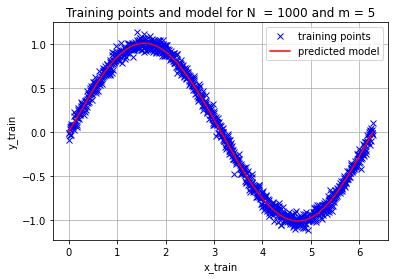


 Training error for N = 1000 and m = 5 is 0.0026221823430339006 



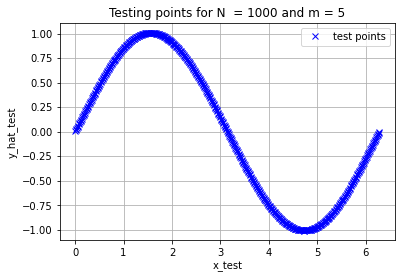


 Testing error for N = 1000 and m = 5 is 0.002379684237688472 


 The model seems to be the best fit.


In [20]:
N=1000

x_train,y_train,X_train = training_points( N, m=5)

w = weights(X_train,y_train)

x_test , y_test , X_test = test_points(N//2 , m=5)

report(x_train , y_train , X_train , x_test , y_test , X_test ,w)

print("\n The model seems to be the best fit.")

## General Observations:


1.   In general, as the number of training points increase, keeping the model constant, the training and testing error tend to decrease. Also, for $N = 10$, there seems to be a massive difference between the training and testing errors, probably caused due to the limited number and the discreteness of the samples. Thus, most of the observations have been made keeping in mind the errors when $N = 100$ or $N = 1000$.

2.   $\hat{y} = f(x , \theta) = \beta_0 + \beta_1 x$ and $\hat{y} = f(x , \theta) = \beta_0 + \beta_1 x + \beta_2 x^2$ seem like underfitting models, as evidenced by the higher MSE training and testing errors.

3. $\hat{y} = f(x , \theta) = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3$ and $\hat{y} = f(x , \theta) = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + \beta_4 x^4$ seem to be a good fit for the model, as evidenced by the sudden drop in MSE error rates from the $m=1$ and $m=2$ models.

4. In terms of the error rates, $\hat{y} = f(x , \theta) = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + \beta_4 x^4 + \beta_5 x^5$ seems to have the best performance for the generated training model, and does equally well on the generated training set.

